# EFFECT OF THE CONCENTRATION OF PHOTOCHROME MOLECULES ON THE HTPB MATRIX

In [11]:
# Reload all modules
# This is useful when you need to edit a module without
# closing the notebook.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load common modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [3]:
# Modules STAMPTOOLS

from stamptools.stamp import STAMP
from stamptools.analysis import load_data
from stamptools.nbconfig import save_fig, rot
from stamptools.stamptools import read_geometry_file

In [4]:
# Definitions

home_path = "../exp.azob.varN"

n_pc = ["2", "5", "10", "20", "20_agg", "50"]

labels = {"trans":"$trans$", "cis":r"$cis$", "s1":"S$_1$"}


Param_colors = {
    "pol": "gray"
}

## 1 Polybutadiene polymerization

In [5]:
%%time

# Load all systems

systems = ["pol", "trans", "cis"]
POLYDAT = {}
    
for s in systems:
    if s == "pol":
        system = STAMP(
            f"{home_path}/pol/1_poly/DONNEES.in",
            fatomes = "FATOMES/FAtomes_000500000.in"
        )
        POLYDAT[s] = {}
        POLYDAT[s]["0"] = system.monomers_in_chains(natoms_in_monomer=10)
        
    else:
        POLYDAT[s] = {}
        for n in n_pc:
            print(f"Isomer: {s}, N PC: {n}")
            print("="*80)
            try:
                system = STAMP(
                    f"{home_path}/{s}/{n}/1_poly/DONNEES.in",
                    fatomes = "FATOMES/FAtomes_000500000.in"
                )
                POLYDAT[s][n] = system.monomers_in_chains(natoms_in_monomer=10)
            
            except FileNotFoundError:
                print(f"\t{home_path}/{s}/{n}/1_poly/DONNEES.in")
                pass
    print("="*80)

Reading log file - done in 0.11 s
Reading fatomes file - done in 3.30 s
Searching connectivity - done in 3.57 s
Number of frames 102
Isomer: trans, N PC: 2
Reading log file - done in 0.12 s
Reading fatomes file - done in 3.34 s
Searching connectivity - done in 3.65 s
Number of frames 502
Isomer: trans, N PC: 5
Reading log file - done in 0.07 s
Reading fatomes file - done in 3.45 s
Searching connectivity - done in 3.58 s
Number of frames 202
Isomer: trans, N PC: 10
Reading log file - done in 0.07 s
Reading fatomes file - done in 3.25 s
Searching connectivity - done in 3.99 s
Number of frames 201
Isomer: trans, N PC: 20
Reading log file - done in 0.09 s
Reading fatomes file - done in 3.22 s
Searching connectivity - done in 3.97 s
Number of frames 201
Isomer: trans, N PC: 20_agg
Reading log file - done in 0.10 s
Reading fatomes file - done in 3.22 s
Searching connectivity - done in 2.52 s
Number of frames 201
Isomer: trans, N PC: 50
Reading log file - done in 0.06 s
Reading fatomes file -

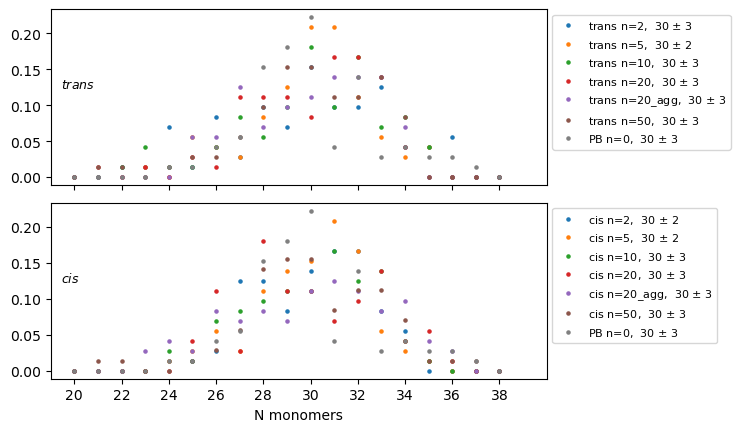

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

isomers = ['trans', 'cis']
bins = np.arange(20, 40, 1)

for i, iso in enumerate(isomers):
    
    ax[i].text(
            0.02, 0.55,
            "{}".format(labels[iso]), transform=ax[i].transAxes,
            ha="left",
            rotation=0, fontsize=9
        )

    for n in POLYDAT[iso]:
        vals = np.array(POLYDAT[iso][n].copy())
        hist, _ = np.histogram(vals, bins=bins, density=True)
        
        ax[i].plot(
            bins[:-1],
            hist, ".", ms = 4.5,
            label = f"{iso} n={n}," + r"  %.0f $\pm$ %.0f" % (vals.mean(), vals.std())
        )
    
    ### 
    vals = np.array(POLYDAT["pol"]["0"].copy())
    hist, _ = np.histogram(vals, bins=bins, density=True)
    
    ax[i].plot(
        bins[:-1],
        hist, ".", ms = 4.5,
        label = f"PB n=0," + r"  %.0f $\pm$ %.0f" % (vals.mean(), vals.std()),
        color = Param_colors["pol"]
    )
    
    ax[i].set_xlim(19, 40)
    ax[i].set_xticks(bins[::2])
    ax[i].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1., 1.0))
    
    if i != 1:
        ax[i].set_xticklabels([])
        ax[i].set_xlabel("")
        
ax[1].set_xlabel("N monomers")
    
# save_fig("polymerization_results.png", "../figures/")
plt.show()

In [7]:
POLvals = {
    "index": [],
    "columns": [],
    "data": [],
    "index_names": ["system", "n"],
    "column_names": ["Polymer chain", ""]
}

lines = []

for s in POLYDAT:
    for n in POLYDAT[s]:
        POLvals["index"].append((s, n))
        
        values = np.array(POLYDAT[s][n].copy())
        lines.append([
            values.mean(), values.std(), values.min(), values.max()
        ])

        
POLvals["columns"].append(("N monomers", "mean"))
POLvals["columns"].append(("N monomers", "std"))
POLvals["columns"].append(("N monomers", "min"))
POLvals["columns"].append(("N monomers", "max"))

POLvals["data"] = np.array(lines)

In [8]:
POLtab = pd.DataFrame.from_dict(POLvals, orient='tight')
POLtab.style.format(precision=0)

## 2 Minimization

In [9]:
%%time

# Load all systems

systems = ["pol", "trans", "cis"]
MINDAT = {}
    
for s in systems:
    if s == "pol":
        data = load_data(
            f"{home_path}/pol/2_min/Stamp.dat",
            t = "LNVT"
        )

        MINDAT[s] = {}
        MINDAT[s]["0"] = data
        
    else:
        MINDAT[s] = {}
        for n in n_pc:
            try:
                data = load_data(
                    f"{home_path}/{s}/{n}/2_min/Stamp.dat",
                    t = "LNVT"
                )
                MINDAT[s][n] = data
            
            except FileNotFoundError:
                print(f"Not found:\t{home_path}/{s}/{n}/2_min/Stamp.dat")
                pass


CPU times: user 1.66 s, sys: 188 ms, total: 1.85 s
Wall time: 1.86 s


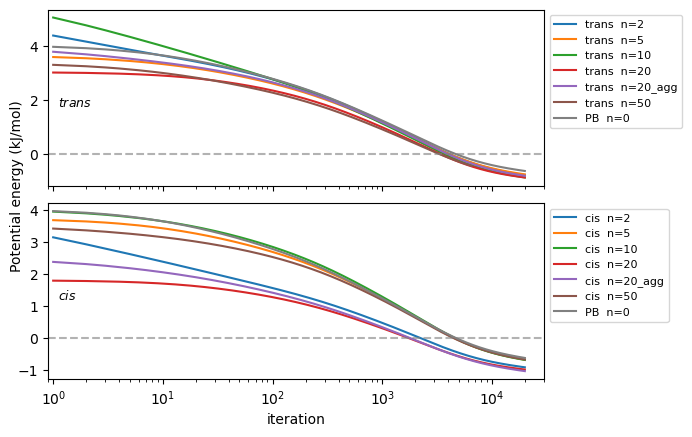

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

isomers = ['trans', 'cis']
# bins = np.arange(20, 40, 1)

for i, iso in enumerate(isomers):
    
    ax[i].text(
            0.02, 0.45,
            "{}".format(labels[iso]), transform=ax[i].transAxes,
            ha="left",
            rotation=0, fontsize=9
        )

    for n in MINDAT[iso]:
        data = MINDAT[iso][n].copy()
        data.drop(index=[0], inplace=True)
        ax[i].plot(
            data["Epot"],
            label = f"{iso}  n={n}"
        )
    
    ### 
    data = MINDAT["pol"]["0"].copy()
    data.drop(index=[0], inplace=True)
    
    ax[i].plot(
            data["Epot"],
            label = f"PB  n=0",
            color = Param_colors["pol"]
        )
    
    ax[i].axhline(y=0, ls="--", color="gray", alpha=0.6)
    
    ax[i].set_xlim(0.9e-0, 3e4)
    #ax[i].set_xticks(bins[::2])
    ax[i].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1., 1.0))
    
    ax[i].set_xscale("log")
    
    if i != 1:
        ax[i].set_xticklabels([])
        ax[i].set_xlabel("")
    
ax[0].set_ylabel("Potential energy (kJ/mol)", y=0.)
ax[1].set_xlabel("iteration")

# save_fig("minimization_results.png", "../figures/")
plt.show()

## 4 NPT

In [12]:
%%time

# Load all systems

systems = ["pol", "trans", "cis"]
NPTDAT = {}
    
for s in systems:
    if s == "pol":
        data = load_data(
            f"{home_path}/pol/4_npt/Stamp.dat",
            t = "NPT"
        )

        NPTDAT[s] = {}
        NPTDAT[s]["0"] = data
        
    else:
        NPTDAT[s] = {}
        for n in n_pc:
            try:
                data = load_data(
                    f"{home_path}/{s}/{n}/4_npt/Stamp.dat",
                    t = "NPT"
                )
                NPTDAT[s][n] = data
            
            except FileNotFoundError:
                print(f"Not found:\t{home_path}/{s}/{n}/4_poly/Stamp.dat")
                pass


CPU times: user 514 ms, sys: 65.6 ms, total: 580 ms
Wall time: 592 ms


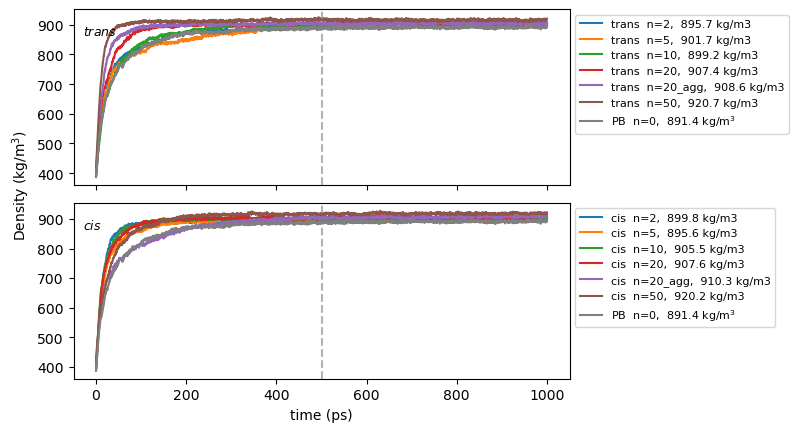

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

isomers = ['trans', 'cis']
# bins = np.arange(20, 40, 1)

for i, iso in enumerate(isomers):
    
    ax[i].text(
            0.02, 0.85,
            "{}".format(labels[iso]), transform=ax[i].transAxes,
            ha="left",
            rotation=0, fontsize=9
        )

    for n in NPTDAT[iso]:
        data = NPTDAT[iso][n].copy()
        vals = data["Dens"].values
        ax[i].plot(
            data["time"],
            data["Dens"],
            label = f"{iso}  n={n}," + "  %.1f kg/m3" % vals[-1]
        )
    
    ### 
    data = NPTDAT["pol"]["0"].copy()
    vals = data["Dens"].values
    ax[i].plot(
            data["time"],
            data["Dens"],
            label = f"PB  n=0," + r"  %.1f kg/m$^3$" % vals[-1],
            color = Param_colors["pol"]
        )
    
    # ax[i].axhline(y=0, ls="--", color="gray", alpha=0.6)
    ax[i].axvline(x=500, ls="--", color="gray", alpha=0.6)
    
    ##ax[i].set_xlim(0.9e-0, 3e4)
    #ax[i].set_xticks(bins[::2])
    ax[i].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1., 1.0))
    
    ##ax[i].set_xscale("log")
    
    if i != 1:
        ax[i].set_xticklabels([])
        ax[i].set_xlabel("")
    
ax[0].set_ylabel("Density (kg/m$^3$)", y=0.)
ax[1].set_xlabel("time (ps)")

save_fig("equilibration_npt_results.png", "../figures/")
plt.show()

In [14]:
DENSvals = {
    "index": [],
    "columns": ["density"],
    "data": [],
    "index_names": ["system", "n"],
    "column_names": [""]
}

lines = []

for s in NPTDAT:
    for n in NPTDAT[s]:
        DENSvals["index"].append((s, n))
        
        lines.append(NPTDAT[s][n]["Dens"].iloc[2400:].mean())
        # lines.append(NPTDAT[s][n]["Dens"].tail(5).mean())


DENSvals["data"] = np.array(lines)

In [15]:
DENStab = pd.DataFrame.from_dict(DENSvals, orient='tight')
DENStab.style.format(precision=2)

In [16]:
DENSisomers = {}

for iso in ["trans", "cis"]:
    x_vals = []
    y_vals = []
    name = []
    for n in n_pc:
        x_vals.append(int(n.replace("_agg","")))
        y_vals.append(DENStab.loc[(iso, n), "density"])
        name.append(n)
        
    DENSisomers[iso] = pd.DataFrame({
        "n": x_vals,
        "density": y_vals,
        "name": name
    })

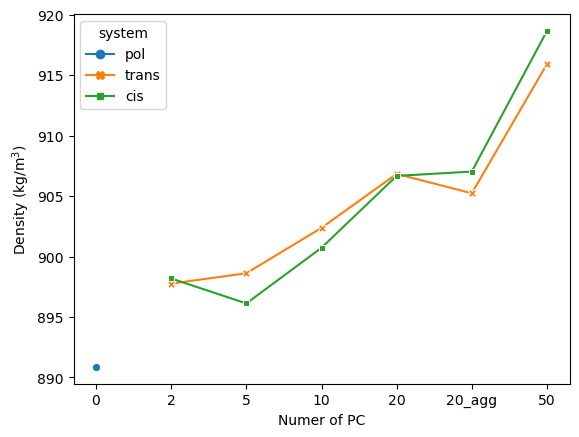

In [17]:
fig, ax = plt.subplots()

#sns.scatterplot(data=DENStab, x="n", y="density", hue="system", ax=ax)
sns.lineplot(
    data=DENStab,
    x="n",
    y="density",
    hue="system",
    ax=ax,
    markers=True,
    style="system",
    dashes=False
)

ax.set_xlabel("Numer of PC")
ax.set_ylabel("Density (kg/m$^3$)")

save_fig("Density_vs_N-PC.png", "../figures/")

plt.show()

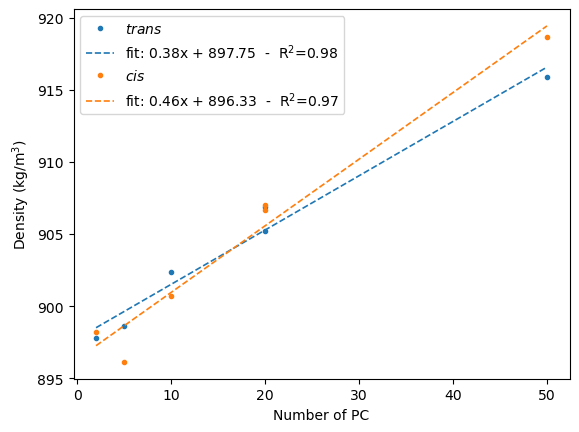

In [18]:
fig, ax = plt.subplots()

iso_colors = ["tab:blue", "tab:orange"]

for i, iso in enumerate(DENSisomers):
    data = DENSisomers[iso].copy()
    regress = linregress(data["n"], data["density"])
    a = regress[0]
    b = regress[1]
    R2 = regress[2]**2
    ax.plot(data["n"], data["density"], ".", color=iso_colors[i], label=labels[iso])
    ax.plot(
        data["n"], a*data["n"] + b,
        ls="--",
        lw=1.2,
        color=iso_colors[i],
        label=f"fit: {a:.2f}x + {b:.2f}  -  R$^2$={R2:.2f}"
    )
    


ax.set_xlabel("Number of PC")
ax.set_ylabel("Density (kg/m$^3$)")

    
ax.legend()

save_fig("Density_vs_N-PC_fitting.png", "../figures/")
plt.show()

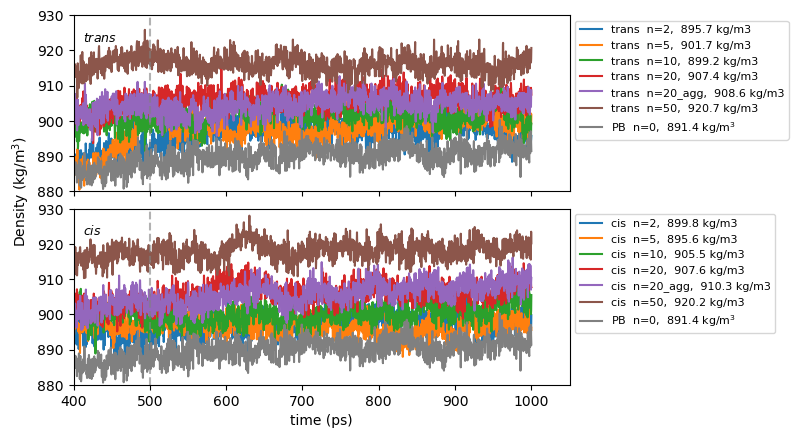

In [31]:
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

isomers = ['trans', 'cis']
# bins = np.arange(20, 40, 1)

for i, iso in enumerate(isomers):
    
    ax[i].text(
            0.02, 0.85,
            "{}".format(labels[iso]), transform=ax[i].transAxes,
            ha="left",
            rotation=0, fontsize=9
        )

    for n in NPTDAT[iso]:
        data = NPTDAT[iso][n].copy()
        vals = data["Dens"].values
        ax[i].plot(
            data["time"],
            data["Dens"],
            label = f"{iso}  n={n}," + "  %.1f kg/m3" % vals[-1]
        )
    
    ### 
    data = NPTDAT["pol"]["0"].copy()
    vals = data["Dens"].values
    ax[i].plot(
            data["time"],
            data["Dens"],
            label = f"PB  n=0," + r"  %.1f kg/m$^3$" % vals[-1],
            color = Param_colors["pol"]
        )
    
    # ax[i].axhline(y=0, ls="--", color="gray", alpha=0.6)
    ax[i].axvline(x=500, ls="--", color="gray", alpha=0.6)
    
    ax[i].set_xlim(xmin=400.)
    ax[i].set_ylim(880, 930)
    #ax[i].set_xticks(bins[::2])
    ax[i].legend(fontsize=8, loc="upper left", bbox_to_anchor=(1., 1.0))
    
    ##ax[i].set_xscale("log")
    
    if i != 1:
        ax[i].set_xticklabels([])
        ax[i].set_xlabel("")
    
ax[0].set_ylabel("Density (kg/m$^3$)", y=0.)
ax[1].set_xlabel("time (ps)")

save_fig("equilibration_npt_results_endpart.png", "../figures/")
plt.show()

The last density value is not the most probable. In some cases.

## Some geometries

#### N=2 - trans

In [5]:
colors_trans = {
    "1": {
        "d_cnnc": "tab:blue",
        "d_ccnn_1": "#66cc99",
        "d_ccnn_2": "#ce7e00",
        "d_ccnn_3": "#9598e6",
        "d_ccnn_4": "#ff666d"
    },
    "0": {
        "d_cnnc": "tab:orange",
        "d_ccnn_1": "#b3bd6d",
        "d_ccnn_2": "#9c90ec",
        "d_ccnn_3": "#0dddc2",
        "d_ccnn_4": "#bda6ac"
    }
}

#### Vacuum

In [7]:
trans_2N_vac = {}
N = 2
isomer = "trans"

for system in ["2_min", "3_melting", "4_nve"]: # "5_prod"
    trans_2N_vac[system] = {}
    for i in range(N):
        data = read_geometry_file(
            f"../exp.azob.varN/{isomer}/{N}/.OLD/vacuum/{system}/Geometry_mol_{i}.csv", freq=1.0, t0=0.0)
        
        data["d_cnnc"] = data["d_cnnc"].apply(rot, deg=0.0)
        data["d_ccnn_3"] = data["d_ccnn_3"].apply(rot, deg=-100.0)
        data["d_ccnn_4"] = data["d_ccnn_4"].apply(rot, deg=-100.0)
        
        trans_2N_vac[system][str(i)] = data.copy()
    

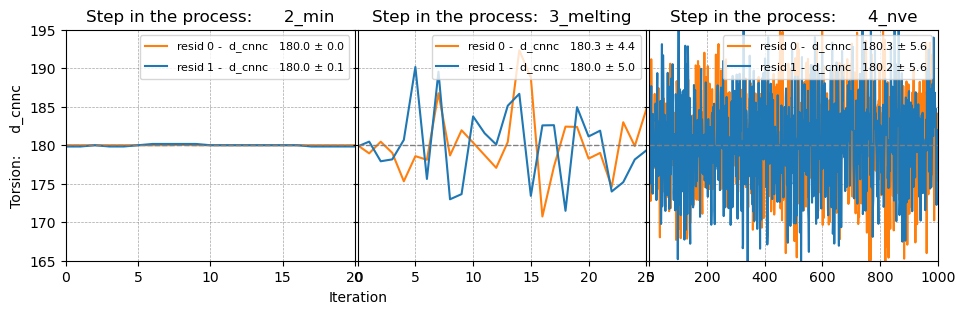

In [19]:
ncols = len(trans_2N_vac)

fig, ax = plt.subplots(ncols=ncols, figsize=(15/4 * ncols,3))

fig.subplots_adjust(wspace=0.01)

tor = "d_cnnc"

for i, system in enumerate(trans_2N_vac):
    ax[i].set_title(f"Step in the process: {system:>10}")
    
    for resid in ["0", "1"]:
        data = trans_2N_vac[system][resid].copy()
        ax[i].plot(
            data["time"], data[tor], "-",
            label=f"resid {resid} -  {tor}   {data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",  #: {data.iloc[500:][tor].mean():.1f} $\pm$ {data.iloc[500:][tor].std():.1f}"
            color=colors_trans[resid][tor]
        )
    
    ax[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax[i].set_ylim(165, 195)
    ax[i].set_xlim(0, data["time"].iloc[-1])
    ax[i].axhline(y=180, ls="--", color="gray", lw=1.)
    
    # ax[i].text(
    #     0.5, 0.05,
    #     f"{data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",
    #     transform=ax[i].transAxes,
    #     ha="center",
    #     rotation=0, fontsize=9
    # )
    
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(f"Torsion: {tor:>10}")
        
    if i == 1:
        ax[i].set_xlabel("Iteration", x=0.)
        
    # if i == 3:
    ax[i].legend(loc="upper right", fontsize=8)
        
        

save_fig(f"evol_torsion_{tor}_resid_0_1_vacuum.png", "../figures")    
plt.show()

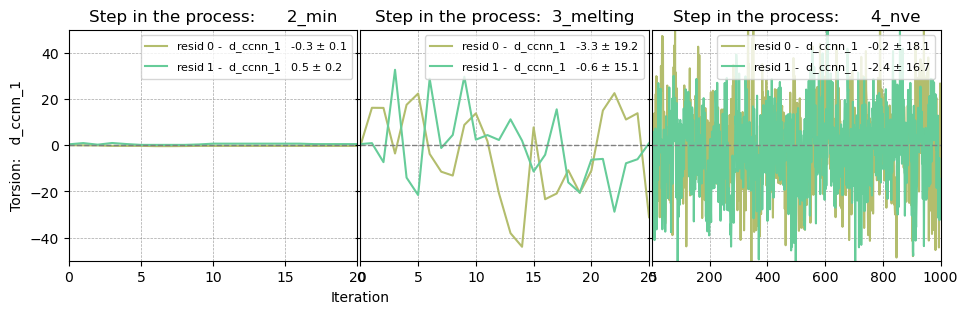

In [20]:
ncols = len(trans_2N_vac)

fig, ax = plt.subplots(ncols=ncols, figsize=(15/4 * ncols,3))

fig.subplots_adjust(wspace=0.01)

tor = "d_ccnn_1"
resid = "1"

for i, system in enumerate(trans_2N_vac):
    ax[i].set_title(f"Step in the process: {system:>10}")

    for resid in ["0", "1"]:
        data = trans_2N_vac[system][resid].copy()
        ax[i].plot(
            data["time"], data[tor], "-",
            label=f"resid {resid} -  {tor}   {data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",  #: {data.iloc[500:][tor].mean():.1f} $\pm$ {data.iloc[500:][tor].std():.1f}"
            color=colors_trans[resid][tor]
        )
    
    ax[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    # ax[i].set_ylim(165, 195)
    ax[i].set_ylim(-50, 50)
    ax[i].set_xlim(0, data["time"].iloc[-1])
    ax[i].axhline(y=0, ls="--", color="gray", lw=1.)
    
    # ax[i].text(
    #     0.5, 0.05,
    #     f"{data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",
    #     transform=ax[i].transAxes,
    #     ha="center",
    #     rotation=0, fontsize=9
    # )
    
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(f"Torsion: {tor:>10}")
        
    if i == 1:
        ax[i].set_xlabel("Iteration", x=0)
        
    # if i == 3:
    ax[i].legend(loc="upper right", fontsize=8)
        
        
save_fig(f"evol_torsion_{tor}_resid_0_1_vacuum.png", "../figures")    
plt.show()

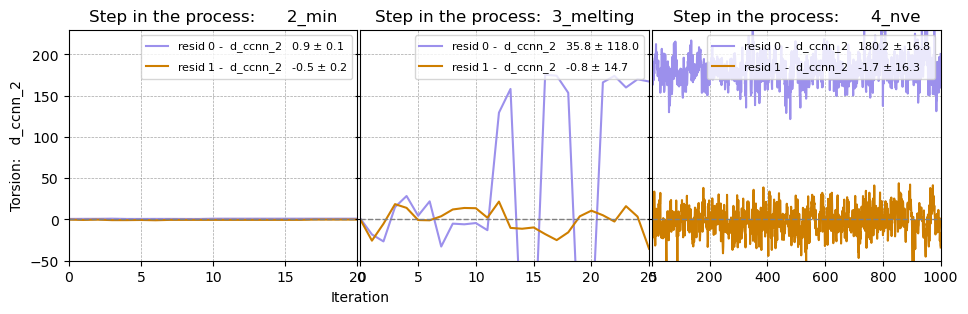

In [21]:
ncols = len(trans_2N_vac)

fig, ax = plt.subplots(ncols=ncols, figsize=(15/4 * ncols,3))

fig.subplots_adjust(wspace=0.01)

tor = "d_ccnn_2"
resid = "1"

for i, system in enumerate(trans_2N_vac):
    ax[i].set_title(f"Step in the process: {system:>10}")

    for resid in ["0", "1"]:
        data = trans_2N_vac[system][resid].copy()
        if resid == "0" and system == "4_nve":
            data[tor] = data[tor].apply(rot)
        ax[i].plot(
            data["time"], data[tor], "-",
            label=f"resid {resid} -  {tor}   {data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",  #: {data.iloc[500:][tor].mean():.1f} $\pm$ {data.iloc[500:][tor].std():.1f}"
            color=colors_trans[resid][tor]
        )
    
    ax[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    # ax[i].set_ylim(165, 195)
    ax[i].set_ylim(-50, 230)
    ax[i].set_xlim(0, data["time"].iloc[-1])
    ax[i].axhline(y=0, ls="--", color="gray", lw=1.)
    
    # ax[i].text(
    #     0.5, 0.05,
    #     f"{data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",
    #     transform=ax[i].transAxes,
    #     ha="center",
    #     rotation=0, fontsize=9
    # )
    
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(f"Torsion: {tor:>10}")
        
    if i == 1:
        ax[i].set_xlabel("Iteration", x=0.)
        
    # if i == 3:
    ax[i].legend(loc="upper right", fontsize=8)
        
        
save_fig(f"evol_torsion_{tor}_resid_0_1_vacuum.png", "../figures")    
plt.show()

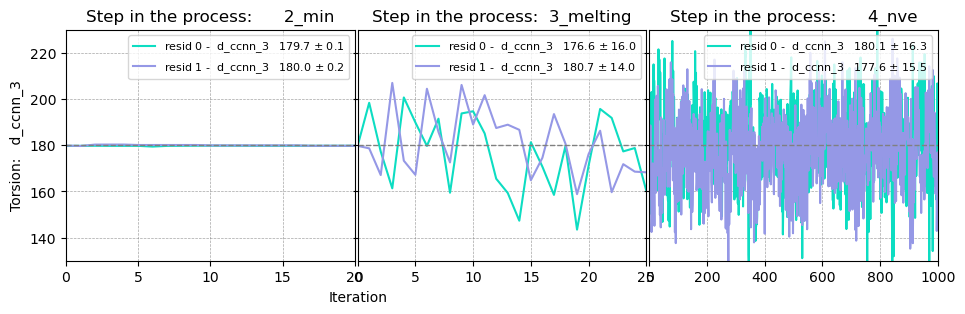

In [22]:
ncols = len(trans_2N_vac)

fig, ax = plt.subplots(ncols=ncols, figsize=(15/4 * ncols,3))

fig.subplots_adjust(wspace=0.01)

tor = "d_ccnn_3"
resid = "1"

for i, system in enumerate(trans_2N_vac):
    ax[i].set_title(f"Step in the process: {system:>10}")

    for resid in ["0", "1"]:
        data = trans_2N_vac[system][resid].copy()
        ax[i].plot(
            data["time"], data[tor], "-",
            label=f"resid {resid} -  {tor}   {data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",  #: {data.iloc[500:][tor].mean():.1f} $\pm$ {data.iloc[500:][tor].std():.1f}"
            color=colors_trans[resid][tor]
        )
    
    ax[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax[i].set_ylim(130, 230)
    # ax[i].set_ylim(-50, 50)
    ax[i].set_xlim(0, data["time"].iloc[-1])
    ax[i].axhline(y=180, ls="--", color="gray", lw=1.)
    
    # ax[i].text(
    #     0.5, 0.05,
    #     f"{data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",
    #     transform=ax[i].transAxes,
    #     ha="center",
    #     rotation=0, fontsize=9
    # )
    
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(f"Torsion: {tor:>10}")
        
    if i == 1:
        ax[i].set_xlabel("Iteration", x=0.)
        
    #if i == 3:
    ax[i].legend(loc="upper right", fontsize=8)
        
        

save_fig(f"evol_torsion_{tor}_resid_0_1_vacuum.png", "../figures")    
plt.show()

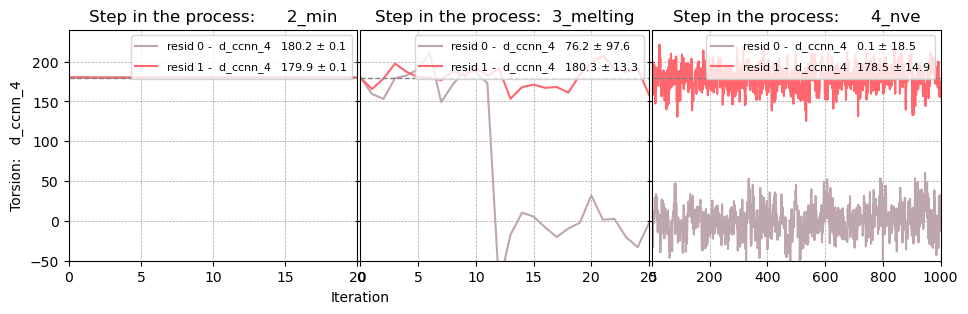

In [23]:
ncols = len(trans_2N_vac)

fig, ax = plt.subplots(ncols=ncols, figsize=(15/4 * ncols,3))

fig.subplots_adjust(wspace=0.01)

tor = "d_ccnn_4"

for i, system in enumerate(trans_2N_vac):
    ax[i].set_title(f"Step in the process: {system:>10}")

    for resid in ["0", "1"]:
        data = trans_2N_vac[system][resid].copy()
        ax[i].plot(
            data["time"], data[tor], "-",
            label=f"resid {resid} -  {tor}   {data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",  #: {data.iloc[500:][tor].mean():.1f} $\pm$ {data.iloc[500:][tor].std():.1f}"
            color=colors_trans[resid][tor]
        )
    
    ax[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax[i].set_ylim(-50, 240)
    # ax[i].set_ylim(-50, 50)
    ax[i].set_xlim(0, data["time"].iloc[-1])
    ax[i].axhline(y=180, ls="--", color="gray", lw=1.)
    
    # ax[i].text(
    #     0.5, 0.05,
    #     f"{data[tor].mean():.1f} $\pm$ {data[tor].std():.1f}",
    #     transform=ax[i].transAxes,
    #     ha="center",
    #     rotation=0, fontsize=9
    # )
    
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(f"Torsion: {tor:>10}")
        
    if i == 1:
        ax[i].set_xlabel("Iteration", x=0.)
        
    #if i == 3:
    ax[i].legend(loc="upper right", fontsize=8)
        
        

save_fig(f"evol_torsion_{tor}_resid_0_1_vacuum.png", "../figures")    
plt.show()

In [53]:
hbonds = pd.read_csv(
    f"../exp.azob.varN/{isomer}/{N}/4_npt/hbonds.dat",
    header=None, sep="\s+",
    names=["frame", "n_hb"]
)

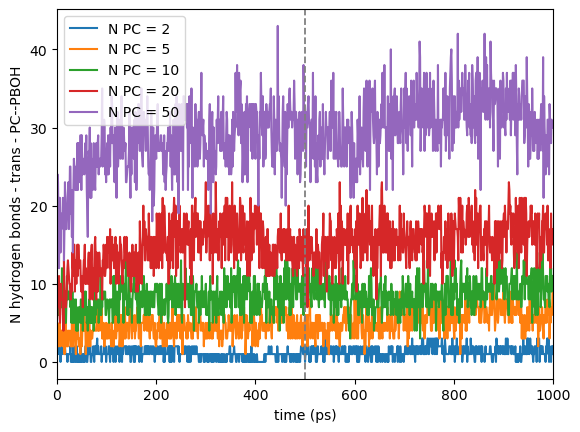

In [26]:
# CNNC

isomer="trans"

fig, ax = plt.subplots()

for n in [2, 5, 10, 20, 50]:
    hbonds = pd.read_csv(
        f"../exp.azob.varN/{isomer}/{n}/4_npt/hbonds.dat",
        header=None, sep="\s+",
        names=["frame", "n_hb"]
    )
    
    
    ax.plot(
        (hbonds["frame"] - 1) * 1.0, hbonds["n_hb"], "-",
        label=f"N PC = {n}"
    )


ax.axvline(x=500., ls="--", lw=1.3, color="gray")
ax.set_xlabel("time (ps)")
ax.set_xlim(0, 1000)
ax.set_ylabel(f"N hydrogen bonds - {isomer} - PC--PBOH")

ax.legend()

save_fig(f"{isomer}_N_hbnds.png", "../figures/")
plt.show()

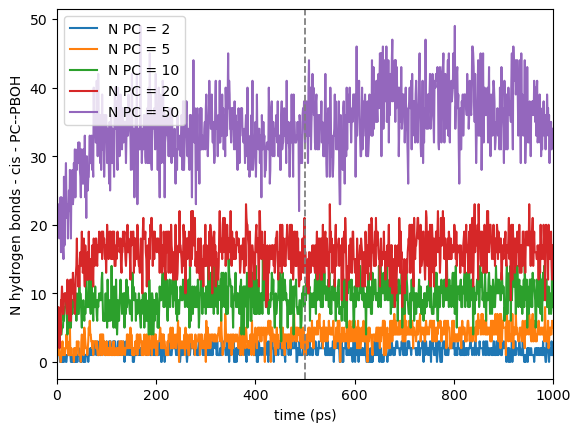

In [27]:
# CNNC

isomer="cis"

fig, ax = plt.subplots()

for n in [2, 5, 10, 20, 50]:
    hbonds = pd.read_csv(
        f"../exp.azob.varN/{isomer}/{n}/4_npt/hbonds.dat",
        header=None, sep="\s+",
        names=["frame", "n_hb"]
    )
    
    
    ax.plot(
        (hbonds["frame"] - 1) * 1.0, hbonds["n_hb"], "-",
        label=f"N PC = {n}"
    )

ax.axvline(x=500., ls="--", lw=1.3, color="gray")
ax.set_xlabel("time (ps)")
ax.set_ylabel(f"N hydrogen bonds - {isomer} - PC--PBOH")
ax.set_xlim(0, 1000)
ax.legend()

save_fig(f"{isomer}_N_hbnds.png", "../figures/")
plt.show()

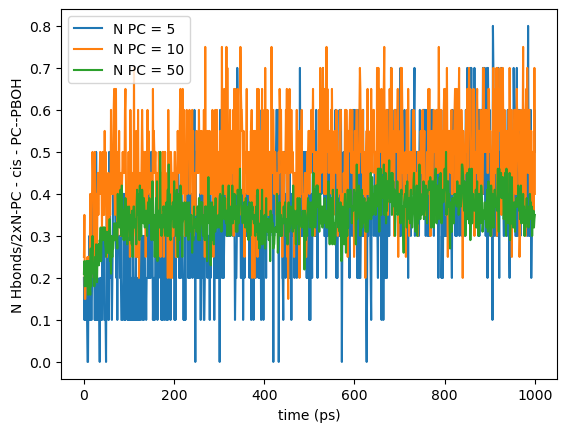

In [71]:
# CNNC

fig, ax = plt.subplots()

for n in [5, 10, 50]:
    
    hbonds = pd.read_csv(
        f"../exp.azob.varN/{isomer}/{n}/4_npt/hbonds.dat",
        header=None, sep="\s+",
        names=["frame", "n_hb"]
    )
    
    
    ax.plot(
        (hbonds["frame"] - 1) * 1.0,
        hbonds["n_hb"] / (2*n),
        "-",
        label=f"N PC = {n}"
    )


ax.set_xlabel("time (ps)")
ax.set_ylabel(f"N Hbonds/2xN-PC - {isomer} - PC--PBOH")

ax.legend()

save_fig(f"{isomer}_N_hbnds_2NPC.png", "../figures/")
plt.show()

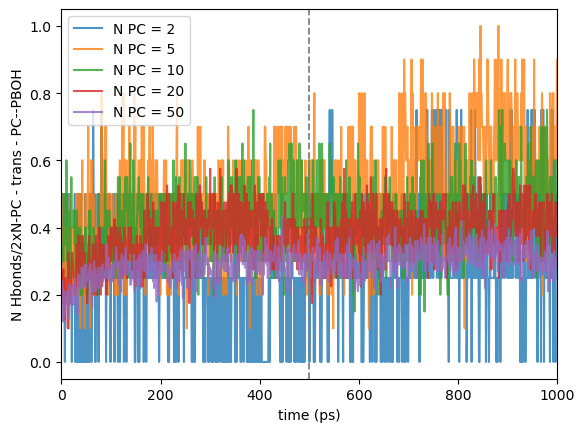

In [29]:
# CNNC

isomer="trans"

fig, ax = plt.subplots()

for n in [2, 5, 10, 20, 50]:
    hbonds = pd.read_csv(
        f"../exp.azob.varN/{isomer}/{n}/4_npt/hbonds.dat",
        header=None, sep="\s+",
        names=["frame", "n_hb"]
    )
    
    
    ax.plot(
        (hbonds["frame"] - 1) * 1.0,
        hbonds["n_hb"] / (2*n), "-",
        label=f"N PC = {n}", alpha=0.8
    )

ax.axvline(x=500., ls="--", lw=1.3, color="gray")
ax.set_xlabel("time (ps)")
ax.set_ylabel(f"N Hbonds/2xN-PC - {isomer} - PC--PBOH")
ax.set_xlim(0, 1000)
ax.legend()

save_fig(f"{isomer}_N_hbnds_relation.png", "../figures/")
plt.show()

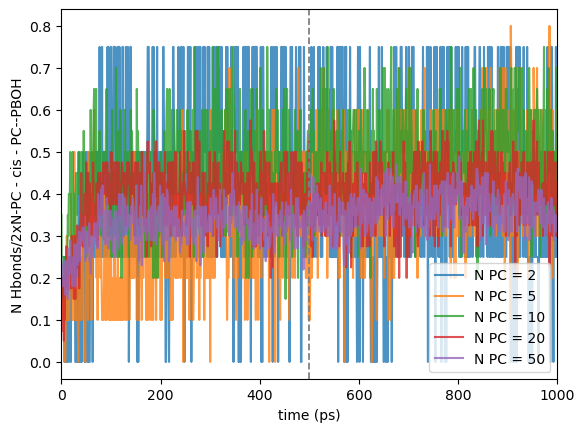

In [28]:
# CNNC

isomer="cis"

fig, ax = plt.subplots()

for n in [2, 5, 10, 20, 50]:
    hbonds = pd.read_csv(
        f"../exp.azob.varN/{isomer}/{n}/4_npt/hbonds.dat",
        header=None, sep="\s+",
        names=["frame", "n_hb"]
    )
    
    
    ax.plot(
        (hbonds["frame"] - 1) * 1.0,
        hbonds["n_hb"] / (2*n), "-",
        label=f"N PC = {n}", alpha=0.8
    )

ax.axvline(x=500., ls="--", lw=1.3, color="gray")
ax.set_xlabel("time (ps)")
ax.set_ylabel(f"N Hbonds/2xN-PC - {isomer} - PC--PBOH")
ax.set_xlim(0, 1000)
ax.legend()

save_fig(f"{isomer}_N_hbnds_relation.png", "../figures/")
plt.show()